In [1]:
#Import of MobileNet repositories
from keras.applications import MobileNet
mobilenet=MobileNet(weights='imagenet') 

Using TensorFlow backend.


In [2]:
#Import Libraries
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Definition of the additional layers
from keras.layers import Dense,GlobalAveragePooling2D

base_model=MobileNet(weights='imagenet', include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(6,activation='softmax')(x)

C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [4]:
#Definition of the Model
from keras.models import Model

model=Model(inputs=base_model.input,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [5]:
#Determining the layers for additional training
for layer in model.layers[:-5]:
    layer.trainable=False

In [6]:
#Importing of training photos of the data set
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(
    './Guitars/',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3389 images belonging to 6 classes.


In [7]:
#Model Compilation
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
#Model Training
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n/train_generator.batch_size,
    epochs=11
)

Epoch 1/11
 45/105 [===========>..................] - ETA: 48s - loss: 1.5958 - acc: 0.3715

C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


 65/105 [=================>............] - ETA: 33s - loss: 1.4358 - acc: 0.4284

C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20054016 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Marcin\Anaconda3\envs\workspace-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 34865152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


106/105 [==============================] - 93s 879ms/step - loss: 1.2941 - acc: 0.4890
Epoch 2/11
106/105 [==============================] - 71s 671ms/step - loss: 0.8215 - acc: 0.6902
Epoch 3/11
106/105 [==============================] - 65s 618ms/step - loss: 0.6460 - acc: 0.7675
Epoch 4/11
106/105 [==============================] - 67s 629ms/step - loss: 0.5345 - acc: 0.8059
Epoch 5/11
106/105 [==============================] - 70s 661ms/step - loss: 0.4754 - acc: 0.8301
Epoch 6/11
106/105 [==============================] - 69s 649ms/step - loss: 0.4321 - acc: 0.8422
Epoch 7/11
106/105 [==============================] - 68s 637ms/step - loss: 0.3667 - acc: 0.8667
Epoch 8/11
106/105 [==============================] - 68s 640ms/step - loss: 0.3046 - acc: 0.8919
Epoch 9/11
106/105 [==============================] - 77s 722ms/step - loss: 0.3039 - acc: 0.8949
Epoch 10/11
106/105 [==============================] - 74s 703ms/step - loss: 0.2263 - acc: 0.9250
Epoch 11/11
106/105 [=========

In [9]:
#Definition of the outputs
print(train_generator.class_indices)

{'Hollow Body': 0, 'Les Paul': 1, 'SG': 2, 'Semi Hollow': 3, 'Stratocaster': 4, 'Telecaster': 5}


In [10]:
#from tkinter import *
#from tkinter.filedialog import askopenfilename

#root = Tk()
#root.update()
#filename = askopenfilename()
#root.destroy()

In [23]:
import cv2

cam = cv2.VideoCapture(0)   # 0 -> index of camera
s, img = cam.read()
if s:    # frame captured without any errors
    cv2.namedWindow("cam-test",cv2.WINDOW_AUTOSIZE)
    cv2.imshow("cam-test",img)
    cv2.waitKey(0)
    cv2.destroyWindow("cam-test")
    cv2.imwrite("filename.jpg",img) #save image

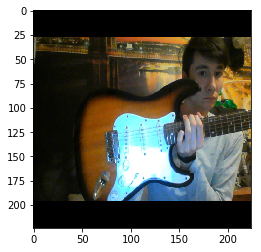

4

In [24]:
#Test Prediction
original = load_img('filename.jpg', target_size=(224, 224))
plt.imshow(original)
plt.show()
 
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)

result = np.argmax(predictions)

result

In [25]:
#Redirecting to the shop categories
import webbrowser
if result == 0:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 1:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/les-paul?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 2:
    webbrowser.open('https://www.andertons.co.uk/sg-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')   
elif result == 3:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 4:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/stratocaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
else:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/telecaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')